In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def acceptance_probability(current, proposed, target_density):
    # Calculate the acceptance probability

    return min(1, target_density(proposed) / target_density(current))

In [18]:
def random_walk_metropolis_sampler(initial_value, step_length, target_density, iterations=10000):

    # RWM Sampler implementation
    current = initial_value
    samples = [current]
    
    for _ in range(iterations):
        proposed = current + np.random.normal(0, step_length)
        alpha = acceptance_probability(current, proposed, target_density)
        
        if np.random.rand() < alpha:
            current = proposed
        
        samples.append(current)
    
    return np.array(samples)

In [19]:
target_density = lambda x: np.exp(-.5 * pow(x,2)) / np.sqrt(2 * np.pi) # Function call to non-norm target dens

In [20]:
initial_value = 0
step_length = float(input("Enter Step Length for tuning: "))

In [21]:
samples = random_walk_metropolis_sampler(initial_value, step_length, target_density)

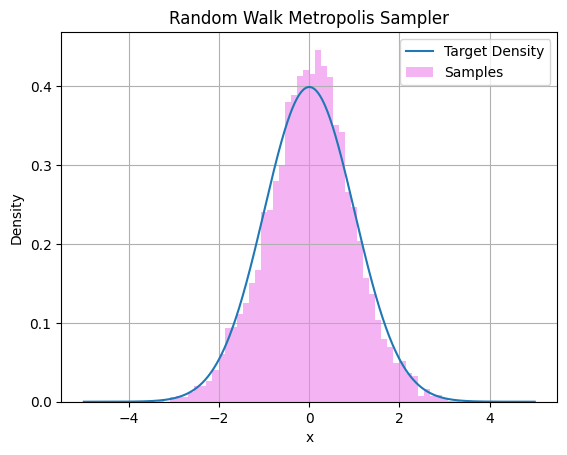

In [27]:
# Plot the target density function
x_vals = np.linspace(-5, 5, 1000)
plt.plot(x_vals, target_density(x_vals), label='Target Density')

# Plot the sampled values
plt.hist(samples, bins=50, density=True, alpha=0.6, color='violet', label='Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Random Walk Metropolis Sampler')
plt.legend()
plt.grid(True)
plt.show()